# Contexto do Problema de Negócio

A Xtreme Groovy Bikes Sales é uma empresa de revenda de motocicletas. Seu modelo de nogócio é revender motocicletas usadas. Com a crescente do valor dos veículos usados, a XGB Sales, como é conhecida, deseja expandir os seus negócios. Você foi contratado como cientista de dados pela empresa XGB Sales para ajudá-los a encotrar as melhores motocicletas para revenda.

Para isso, o CEO da empresa fez um estudo de mercado lhe entregou uma base de dados, obtida através desse estudo, para que você consiga auxiliá-lo a encontrar as melhores motocicletas para revenda, aumentando assim o lucro da empresa.

Além disso, o CEO lhe fez algumas perguntas a cerca da base de dados que a empresa possui. Lembrando que o contexto, pessoas e perguntas são completamente fictícios, criados para estudo.

# A base de dados

O conjunto de dados que representam o contexto está disponível na plataforma do Kaggle. O link para acesso aos dados:

https://www.kaggle.com/datasets/nehalbirla/motorcycle-dataset

# O desafio

A empresa XGB Sales lhe contratou como cientista de dados pois ela deseja aumentar o seu lucro comprando e revendendo as melhores motos disponíveis dentro da base de dados que a empresa adquiriu através de um estudo de mercado.

Dessa forma, o CEO da XGB Sales lhe fez as seguintes perguntas:

1. Quantas motos temos dentro do Dataset?
2. Qual é o ano da moto mais antiga da base de dados?
3. Qual é o ano da moto mais nova da base de dados?
4. Qual é o valor da moto mais cara da base de dados?
5. Qual é o valor do hodômotro da moto com a maior quilometragem?
6. Qual é o valor do  da moto com a menor quiilometragem?
7. Das motocicletas que estão sendo expostas dentro de um Show Room, qual é o maior valor registrado na base de dados?
8. Das motocicletas que estão sendo expostas dentro de um Show Room, qual é o menor valor registrado na base de dados?
9. Quantas motocicletas estão sendo vendidades pelos seus donos e quantas estão sendo vendidas por outros revendedores?
10. Qual é a média de valores das motos na base de dados?
11. Qual é a média de ano das motos cadastradas dentro da base de dados?
12. Qual é a média de quilometragem das motos cadastradas dentro da base de dados?
13. Existem quantas motos dentro da base de dados que são motos de um único dono?
14. As motos com menor quilometragem são as motos mais baratas do Dataset?
15. As motos que possuiram somente 1 dono são as motos mais caras na média que as motos que tiveram mais donos?
16. As motos que possuiram mais donos são as motos que possuem quilometragem média maior que as motos que possuiram menos donos?
17. As motos que possuiram mais donos são as motos mais velhas na média?
18. As motos que são vendidas por revendedores são as motos mais caras na média do que as motos vendidas pelos seus donos?
19. O CEO lhe entregou um novo dataset chamado companies.csv, onde estão todas as fabricantes de motocicletas. Adicione uma coluna no DataFrame com o nome de company. Essa coluna deve possuir o nome do fabricante de cada moto do DataFrame.
20. Crie um novo dataset chamado bikes_completed.csv a partir do DataFrame com a coluna company preenchida.
21. Quais são so fabricantes que mais possuem motos cadastradas na base de dados completa?
22. Ajustar a coluna `name` para que ela fique somente com o nome da moto.
23. Qual das fabricantes possui o maior preço médio de suas motos?
24. Qual é a média de Km rodados por fabricante?
25. Qual é o ano da moto mais velha de cada fabricante?
26. O fabricante que possui a moto mais cara do Dataset é também o fabricante que possui menos motos cadastradas?
27. Qual o fabricante que possui a menor variação de valor de venda?

Pergunta final:      

Quais motos eu devo comprar?                                                                                            
Leve em conta que eu desejo motos com no máximo 3 anos de uso; no máximo 40 mil quilometros rodados; que sejam de um único dono; que estejam sendo vendidas por possoas físicas e que tenham o valor pretendido de venda menor que o valor do showroom. Envie um relatório contendo o modelo, preço de venda, quilometro rodado e ano, ordenado por valor de venda de forma decrescente para uma planilia no Excel.

# imports

In [72]:
import pandas as pd #pandas para melhor análise de dados

from matplotlib import pyplot as plt #pyplot para melhor visualização dos dados

import seaborn as sns #seaborn para melhorar a qualidade dos gráficos de visualização
sns.set() #Configurando o seaborn
sns.set({'figure.figsize': (15, 8)}) #Configurando o seaborn

import warnings
warnings.filterwarnings( 'ignore' ) #Desativando os warnings para melhor organização

import numpy as np #numpy para habilidades matematicas
import math #math para habilidades matematicas

import openpyxl

ModuleNotFoundError: No module named 'openpyxl'

# Solucionando o desafio!

## Lendo e organizando a base de dados

In [6]:
df.dtypes

id                     int64
name                  object
selling_price          int64
year                   int64
seller_type           object
owner                 object
km_driven              int64
ex_showroom_price    float64
dtype: object

In [39]:
df = pd.read_csv('pergunta_1/bike.csv') #Lendo o Dataframe e salvando na variavel ( df )
df = df.reset_index()
df = df.rename(columns={'index': 'id'})

# Ajustando a coluna para Datetime
df[ 'year' ] = pd.to_datetime( df[ 'year' ], format='%Y')

# Recuperando somente o ano da coluna
df[ 'year' ] = df[ 'year' ].dt.year

df.head()

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price
0,0,Royal Enfield Classic 350,175000,2019,Individual,1st owner,350,NaN
1,1,Honda Dio,45000,2017,Individual,1st owner,5650,NaN
2,2,Royal Enfield Classic Gunmetal Grey,150000,2018,Individual,1st owner,12000,148114.0
3,3,Yamaha Fazer FI V 2.0 [2016-2018],65000,2015,Individual,1st owner,23000,89643.0
4,4,Yamaha SZ [2013-2014],20000,2011,Individual,2nd owner,21000,NaN


In [40]:
companies = pd.read_csv('pergunta_2/companies.csv', index_col=0)
companies.sample(5)

,company_name
32,Evolet
66,Nascent
18,CFMoto
29,Ennes
91,Vijaya


Primeiro, é importante saber do que se trata cada coluna antes de começar os trabalhos.

| Coluna | Descrição |
| :----- | --------: |
| ID | Identificador da linha/registro |
| name | Fabricante e Modelo da Moto |
| selling_price | Preço de Venda |
| year | Ano de Fabricação da Moto |
| seller_type | Tipo de Vendedor - Se é vendedor pessoal ou revendedor |
| owner | Se é primeiro, segundo, terceiro ou quarto dono da moto |
| km_driven | Quantidade de Quilometros percorrido pela moto |
| ex_showroom_price | Preço da motocicleta sem as taxas de seguro e registro |

## Respondendo as perguntas

Para melhor organização, vou agrupar as respostas em grupos de 5

### Respostas 1-5

In [41]:
#1. Quantas motos temos dentro do Dataset?

pergunta_1 = df[ 'name' ].isna().sum()
# Verificando de dentro na coluna ( name ) tem algum dado faltante e somando

print(f'Temos { df.shape[0] - pergunta_1 } motos no Dataset') #Descontando os dados faltantes ( se houver )

Temos 1061 motos no Dataset


In [42]:
#2. Qual é o ano da moto mais antiga da base de dados?

pergunta_2 = np.min( df[ 'year' ] )
# Vendo o menor numero da coluna ( year ), sendo assim a mais antiga

print(f'A moto mais antiga é de: { pergunta_2 }')

A moto mais antiga é de: 1988


In [43]:
#3. Qual é o ano da moto mais nova da base de dados?

pergunta_3 = np.max( df[ 'year' ] )
# Vendo o maior numero da coluna ( year ), sendo assim a mais nova

print(f'A moto mais nova é de: { pergunta_3 }')

A moto mais nova é de: 2020


In [44]:
#4. Qual é o valor da moto mais cara da base de dados?

pergunta_4 = np.max( df[ 'selling_price' ] ) 
# Vendo o maior numero da coluna ( selling_price ), sendo assim a mais cara

print(f'A moto mais cara é de: ${ round( pergunta_4 ) }')

A moto mais cara é de: $760000


In [45]:
#5. Qual é o valor do hodômotro da moto com a maior quilometragem?

pergunta_5 = np.max( df[ 'km_driven' ] )
# Vendo o maior numero da coluna ( km_driven ), sendo assim a com maior quilometragem

print(f'O hodômotro da moto com a maior quilometragem é: { pergunta_5 } Km')

O hodômotro da moto com a maior quilometragem é: 880000 Km


### Respostas 6-10

In [46]:
#6. Qual é o valor do da moto com a menor quiilometragem?

pergunta_6 = np.min( df[ 'km_driven' ] ) 
# Pegando o numero da menor quiilometragem

pergunta_6_2 = df[df[ 'km_driven' ] == pergunta_6][['selling_price', 'km_driven']]
# Pegando o ( selling_price ) e o ( km_driven ) da modo com menor quiilometragem

print(f'O valor do da moto com a menor quiilometragem é: ${ pergunta_6_2.loc[ 0, "selling_price" ] }, e tem {pergunta_6_2.loc[ 0, "km_driven" ] }Km rodados')

O valor do da moto com a menor quiilometragem é: $175000, e tem 350Km rodados


In [47]:
#7. Das motocicletas que estão sendo expostas dentro de um Show Room, qual é o maior valor registrado na base de dados?

pergunta_7 = np.max( df[ 'ex_showroom_price' ] )
# Vendo o maior numero da coluna ( ex_showroom_price ), sendo assim a mais cara dessa coluna

print(f'A motocicleta com maior valor dentro do ShowRoom é: ${ int( pergunta_7 ) }')

A motocicleta com maior valor dentro do ShowRoom é: $1278000


In [48]:
#8. Das motocicletas que estão sendo expostas dentro de um Show Room, qual é o menor valor registrado na base de dados?

pergunta_8 = np.min( df[ 'ex_showroom_price' ] )
# Vendo o menor numero da coluna ( ex_showroom_price ), sendo assim a mais barata dessa coluna

print(f'A motocicleta com menor valor dentro do ShowRoom é: ${ int( pergunta_8 ) }')

A motocicleta com menor valor dentro do ShowRoom é: $30490


In [49]:
#9. Quantas motocicletas estão sendo vendidades pelos seus donos e quantas estão sendo vendidas por outros revendedores?

pergunta_9 = df[[ 'seller_type', 'year' ]].groupby( 'seller_type' ).count().reset_index()
# Agrupando os tipos da coluna ( seller_type ), e fazendo a contagem

pergunta_9.columns = [ 'Tipo de vendedor' , 'Contagem' ]
# Nomeando as colunas

pergunta_9.iloc[ 0, 0 ] = 'Revendedores'
# Nomeando os valores

pergunta_9.iloc[ 1, 0 ] = 'Donos'
# Nomeando os valores

pergunta_9

,Tipo de vendedor,Contagem
0,Revendedores,6
1,Donos,1055


In [50]:
#10. Qual é a média de valores das motos na base de dados?

pergunta_10 = round( np.mean( df[ 'selling_price' ]), 2)
# Pegando os valores da coluna ( selling_price ), calculando a média e arredondando os valores para duas casas decimais

print(f'A média de preço das motos são de: ${ pergunta_10 }')

A média de preço das motos são de: $59638.15


### Resposta 11-15

In [51]:
#11. Qual é a média de ano das motos cadastradas dentro da base de dados?

pergunta_11 = round( np.mean( df[ 'year' ] ))
# Pegando e calculando a média da coluna ( year )

print(f'A média de ano das motos é: { pergunta_11 }')

A média de ano das motos é: 2014


In [52]:
#12. Qual é a média de quilometragem das motos cadastradas dentro da base de dados?

pergunta_12 = round( np.mean( df[ 'km_driven' ]), 2)
# Pegando e calculando a média da coluna ( km_driven ), e arredondando

print(f'A média de quilometragem é: { pergunta_12 }Km')

A média de quilometragem é: 34359.83Km


In [53]:
#13. Existem quantas motos dentro da base de dados que são motos de um único dono?

pergunta_13 = df[[ 'year' , 'owner' ]].groupby( 'owner' ).count().sort_values( 'owner' ).reset_index()
# Agrupando os tipos da coluna ( owner ), e fazendo a contagem

print(f'O número de motos que são do primeiro dono é: {pergunta_13.loc[0, "year"]}')

O número de motos que são do primeiro dono é: 924


No geral, motos que rodaram entre 50.000 e 220.000 Km tem uma média de preço de $26.000, já as que rodaram de 450.000 e 900.000 Km estão com preços próximos a $21.000, então sim, elas são as mais baratas.


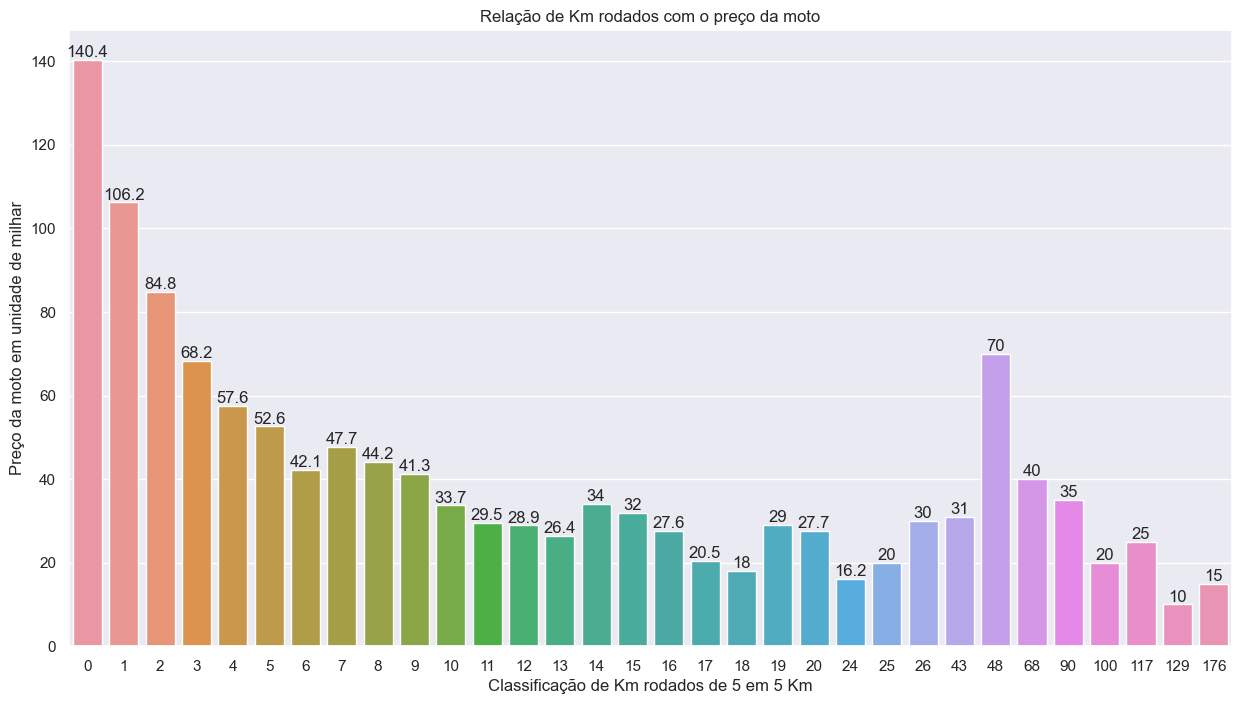

In [54]:
#14. As motos com menor quilometragem são as motos mais baratas do Dataset?

def create_km_class(km_driven):
    return round( km_driven /5000 )
# Criando a função ( create_km_class ) para classificar as motos de 5 em 5 Km

df[ 'km_class' ] = df[ 'km_driven' ].apply( lambda km_driven: create_km_class( km_driven ) )
# Aplicando a função na coluna ( km_driven )
# Criando a coluna ( km_class ) diretamente no Dataset com a classificação de todas as motos

# Parte de visualizar os dados..

pergunta_14 = df.loc[ (df[ 'km_class' ] != 69 ) ]
# Retirando um possível outlier

pergunta_14 = pergunta_14[[ 'km_class', 'selling_price' ]].groupby( 'km_class' ).mean()
# Agrupando os tipos da coluna criada ( km_class ) e calculando a média

pergunta_14 = pergunta_14.sort_values( 'km_class' , ascending=False).reset_index()
# Ordenado pela classificação de km rodados

# Criando um gráfico de barras
ax = sns.barplot(
    data = pergunta_14, # Os dados são ( pergunta_14 )
    x = 'km_class',
    y = round( pergunta_14[ 'selling_price' ] / 1000, 1 ) # Colocando o ( selling_price ) em unidade de milhar para melhor visualização
)

ax.set(
    title = 'Relação de Km rodados com o preço da moto', # Nomeando o título
    ylabel = 'Preço da moto em unidade de milhar', # Nomeando a coluna y
    xlabel = 'Classificação de Km rodados de 5 em 5 Km' # Nomeando a coluna x
)

ax.bar_label(ax.containers[0])
# Colocando os valores em cima de cada barra

print('No geral, motos que rodaram entre 50.000 e 220.000 Km tem uma média de preço de $26.000, já as que rodaram de 450.000 e 900.000 Km estão com preços próximos a $21.000, então sim, elas são as mais baratas.');

In [55]:
#15. As motos que possuiram somente 1 dono são as motos mais caras na média que as motos que tiveram mais donos?

print('Média feita com possíveis out layers')
pergunta_15 = df[ (df[ 'owner' ] == '1st owner')][[ 'selling_price'  ]]
# Fiz uma mask para motos com dono único

pergunta_15_2 = df[ ( df[ 'owner' ] != '1st owner')][[ 'selling_price' ]]
# Fiz outra mask para motos mais de um dono

motos_um_dono = pergunta_15[ 'selling_price' ].mean()
# Calculei a média da coluna ( selling_price ) para motos com um dono

print(f'A média de preço das motos de um dono é: { round( motos_um_dono ) }')

motos_mais_de_um_dono = pergunta_15_2[ 'selling_price' ].mean()
# Calculei a média da coluna ( selling_price ) para motos com mais de um dono

print(f'A média de preço das motos de mais de um dono é: { round( motos_mais_de_um_dono ) }')

df_grouped = df.loc[ (( df[ 'id' ] != 134 ) & ( df[ 'id' ] != 311 ) & ( df[ 'id' ] != 868 )) & ( df[ 'selling_price' ] < 425000 ) , [ 'owner' , 'selling_price' ]]
# Retirando possíveis outliers

df_grouped = df_grouped[[ 'owner' , 'selling_price' ]].groupby( 'owner' ).mean().sort_values( 'owner' ).reset_index()
# Agrupando as motos por donos ( owner ) e tirando a média

print('=' * 40)
print('Média feita sem out layers')
df_grouped

Média feita com possíveis out layers
A média de preço das motos de um dono é: 60023
A média de preço das motos de mais de um dono é: 57044
Média feita sem out layers


,owner,selling_price
0,1st owner,59264.442037
1,2nd owner,46876.024793
2,3rd owner,46300.000000
3,4th owner,12500.000000


### Resposta 16-20

In [56]:
#16. As motos que possuiram mais donos são as motos que possuem quilometragem média maior que as motos que possuiram menos donos?

pergunta_16 = df[ (df[ 'owner' ] == '1st owner' )][[ 'km_driven' ]] 
# Fazendo uma mask para pegar motos de primeiro dono

pergunta_16_2 = df[ (df[ 'owner' ] != '1st owner' )][[ 'km_driven' ]]
# Fazendo outra mask para pegar motos que não são de primeiro dono

print('Média feita com possiveis outliers')
print(f'A média de quilometragem das motos de um dono é: { round( pergunta_16[ "km_driven" ].mean())}')
print(f'A média de quilometragem das motos de mais de um dono é: { round( pergunta_16_2[ "km_driven" ].mean())}')
print('=' * 30)
print('Média feita sem possiveis outliers')

df_grouped = df.loc[ ( df[ 'id' ] != 363 ) & ( df[ 'id' ] != 477 ) & ( df[ 'id' ] != 642 ) & ( df[ 'id' ] != 1 ), [ 'owner' , 'km_driven' ]]
# Retirando possiveis outlayers

df_grouped = df_grouped[[ 'owner', 'km_driven' ]].groupby( 'owner' )
# Agrupando motos por tipos de donos

df_grouped = df_grouped.agg(
    km_driven = pd.NamedAgg( 'km_driven' , 'mean' ),
).sort_values( 'owner' ).reset_index()

df_grouped

Média feita com possiveis outliers
A média de quilometragem das motos de um dono é: 32817
A média de quilometragem das motos de mais de um dono é: 44768
Média feita sem possiveis outliers


,owner,km_driven
0,1st owner,31580.036916
1,2nd owner,39288.991870
2,3rd owner,33292.181818
3,4th owner,27250.000000


In [57]:
#17. As motos que possuiram mais donos são as motos mais velhas na média?

pergunta_17 = df[ (df[ 'owner' ] == '1st owner' )][[ 'year' ]] 
# Fazendo uma mask para pegar motos de primeiro dono

pergunta_17_2 = df[ (df[ 'owner' ] != '1st owner' )][[ 'year' ]]
# Fazendo outra mask para pegar motos que não são de primeiro dono

print(f'A média de ano das motos de um dono é: { round( pergunta_17[ "year" ].mean())}')
print(f'A média de ano das motos de mais de um dono é: { round( pergunta_17_2[ "year" ].mean())}')

A média de ano das motos de um dono é: 2014
A média de ano das motos de mais de um dono é: 2012


In [58]:
#18. As motos que são vendidas por revendedores são as motos mais caras na média do que as motos vendidas pelos seus donos?

mask_1 = df[ (df[ 'seller_type' ] == 'Individual' )][[ 'selling_price' ]] 
# Fazendo uma mask para pegar motos vendidas pelo dono

mask_2 = df[ (df[ 'seller_type' ] != 'Individual' )][[ 'selling_price' ]] 
# Fazendo outra mask para pegar motos vendidas por revendedores

print(f'A média de preço das motos vendidas pelo dono é: { round( mask_1[ "selling_price" ].mean())}')
print(f'A média de preço das motos vendidas por vendedores é: { round( mask_2[ "selling_price" ].mean())}')

A média de preço das motos vendidas pelo dono é: 59712
A média de preço das motos vendidas por vendedores é: 46667


In [59]:
#19. O CEO lhe entregou um novo dataset chamado companies.csv, onde estão todas as fabricantes de motocicletas. Adicione uma coluna no DataFrame com o nome de company. Essa coluna deve possuir o nome do fabricante de cada moto do DataFrame.

def create_sorted_companies_tuple(dataframe):
    companies = dataframe[ 'company_name' ].to_list()

    companies_aux = [ company.split(' ') for company in companies ]
    
    companies_aux.sort( key=len, reverse=True )
    
    sorted_companies = [ ' '.join( company ) for company in companies_aux ]

    return tuple( sorted_companies )


def create_company_name(companies, data):
    for company in companies:
        if company in data[ 'name' ]:
            return company
        
companies_tuple = create_sorted_companies_tuple( companies )

df[ 'company' ] = df.apply( lambda line: create_company_name( companies_tuple, line ), axis=1 )

df.sample(5)

,id,name,selling_price,year,seller_type,owner,km_driven,ex_showroom_price,km_class,company
554,554,Yamaha RX135,65000,1998,Individual,3rd owner,16500,NaN,3,Yamaha
726,726,Honda CB Hornet 160R,80000,2016,Individual,1st owner,100000,92661.0,20,Honda
928,928,Bajaj Avenger [2015],60000,2015,Individual,2nd owner,16000,75502.0,3,Bajaj
377,377,TVS Victor,20000,2001,Individual,1st owner,50000,54852.0,10,TVS
383,383,Bajaj Discover 100 M,20000,2011,Individual,1st owner,37734,44756.0,8,Bajaj


In [60]:
#20. Crie um novo dataset chamado bikes_completed.csv a partir do DataFrame com a coluna company preenchida.

bikes_completed = df.copy()
bikes_completed.to_csv('bikes_completed.csv', index=False)

### Resposta 21-25

In [61]:

Qual das fabricantes possui o maior preço médio de suas motos?
Qual é a média de Km rodados por fabricante?
Qual é o ano da moto mais velha de cada fabricante?

Object `motos` not found.
Object `fabricante` not found.
Object `fabricante` not found.


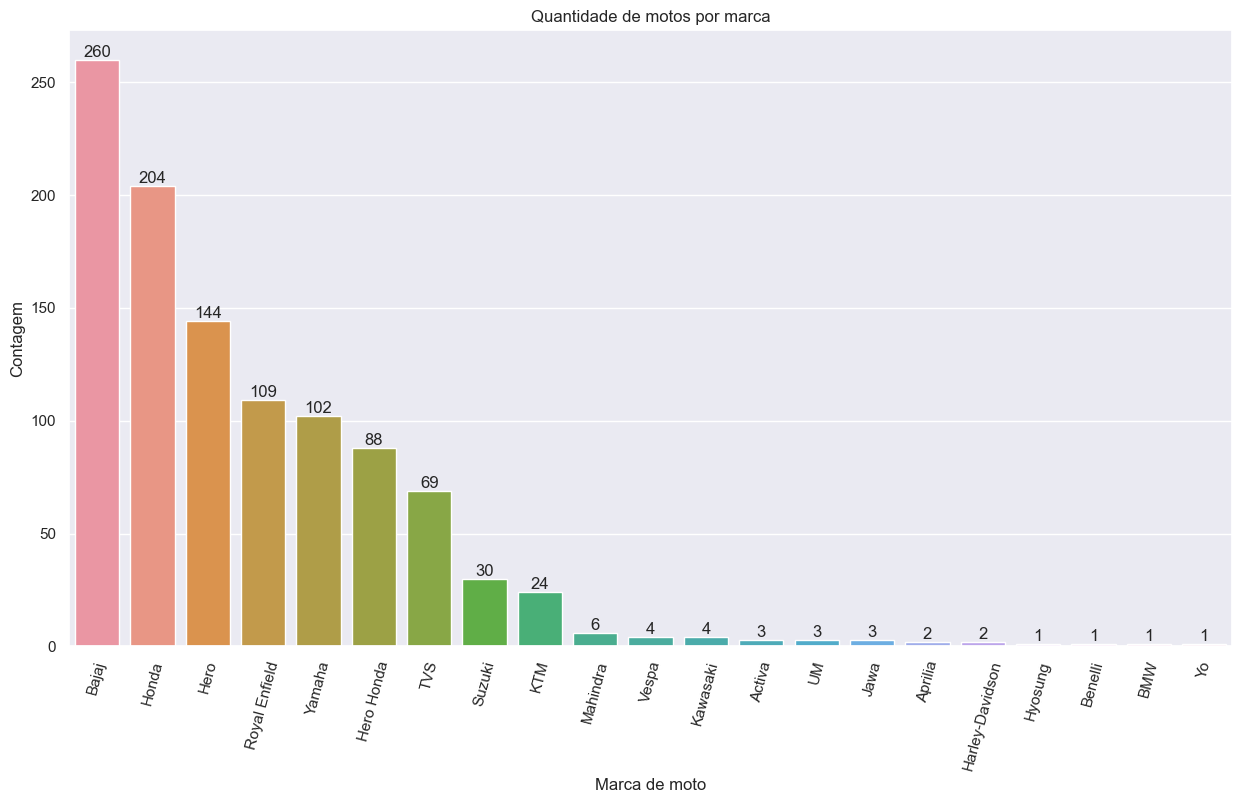

In [62]:
#21. Quais são so fabricantes que mais possuem motos cadastradas na base de dados completa?

pergunta_21 = df.copy()

pergunta_21 = pergunta_21[[ 'company', 'id' ]].groupby( 'company' )
# Agrupando os dados pelos fabricantes

pergunta_21 = pergunta_21.count().sort_values( 'id' , ascending = False).reset_index()
# Somando os fabricantes e ordenando de forma decresente

ax = sns.barplot(
    data = pergunta_21,
    x = 'company',
    y = 'id'
)

ax.set(
    title='Quantidade de motos por marca',
    xlabel = 'Marca de moto',
    ylabel = 'Contagem'
)

ax.bar_label(ax.containers[0])
plt.xticks(rotation=75);

In [63]:
#22. Ajustar a coluna name para que ela fique somente com o nome da moto.

print(df['name'][0])

df[ 'name' ] = df.apply( lambda line: line[ 'name' ].replace( f'{ line[ "company" ]} ', ''), axis = 1 )

print('Depois de ajustado:')
print(df['name'][0])

Royal Enfield Classic 350
Depois de ajustado:
Classic 350


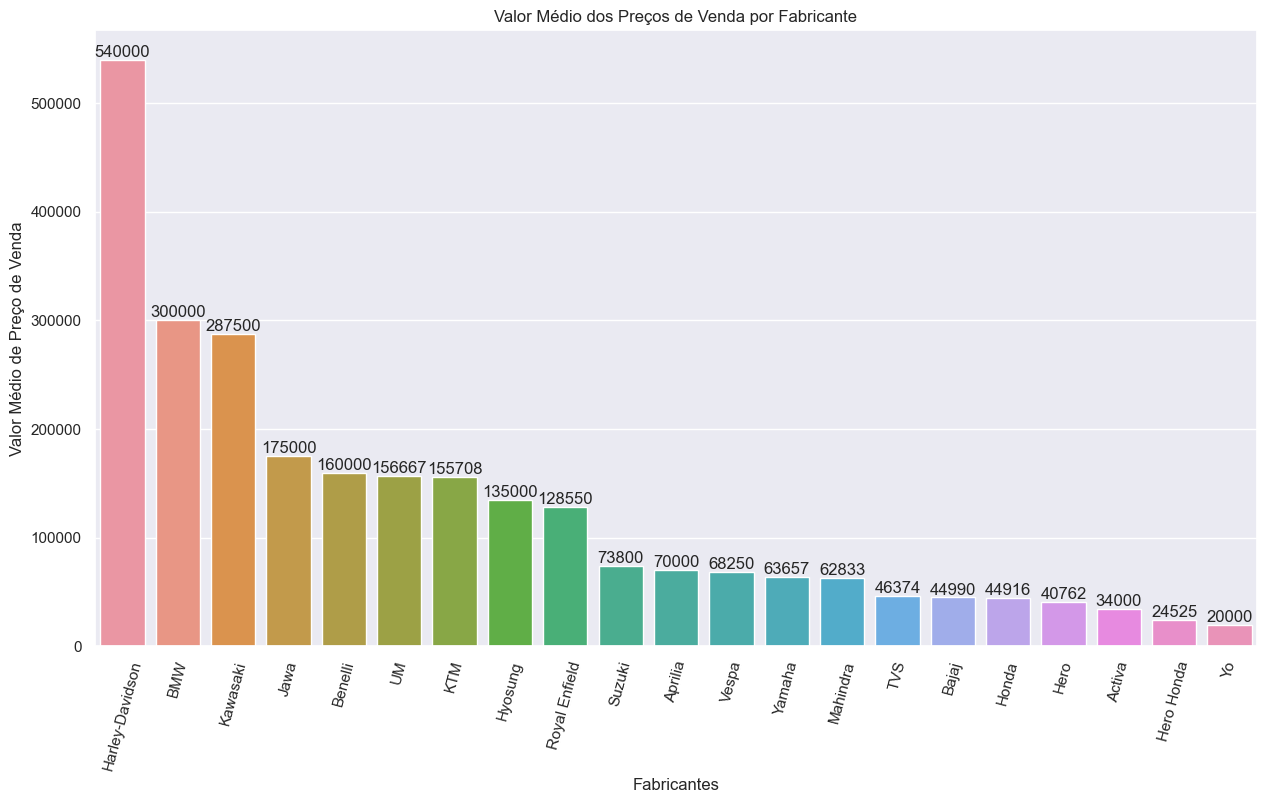

In [64]:
#23. Qual das fabricantes possui o maior preço médio de suas motos?

pergunta_23 = df[[ 'selling_price' , 'company' ]].groupby( 'company' ).mean().sort_values( 'selling_price', ascending=False).reset_index()
# Agrupando por fabricante e tirando a média de preço

pergunta_23[ 'selling_price' ] = pergunta_23[ 'selling_price' ].round()
# Arredondando os preços para melhor visualização

# Visualização
ax = sns.barplot(
    data=pergunta_23, 
    x='company', 
    y='selling_price')

ax.set(xlabel='Fabricantes', 
       ylabel='Valor Médio de Preço de Venda', 
       title='Valor Médio dos Preços de Venda por Fabricante'
)

ax.bar_label(ax.containers[0])
plt.xticks(rotation=75);

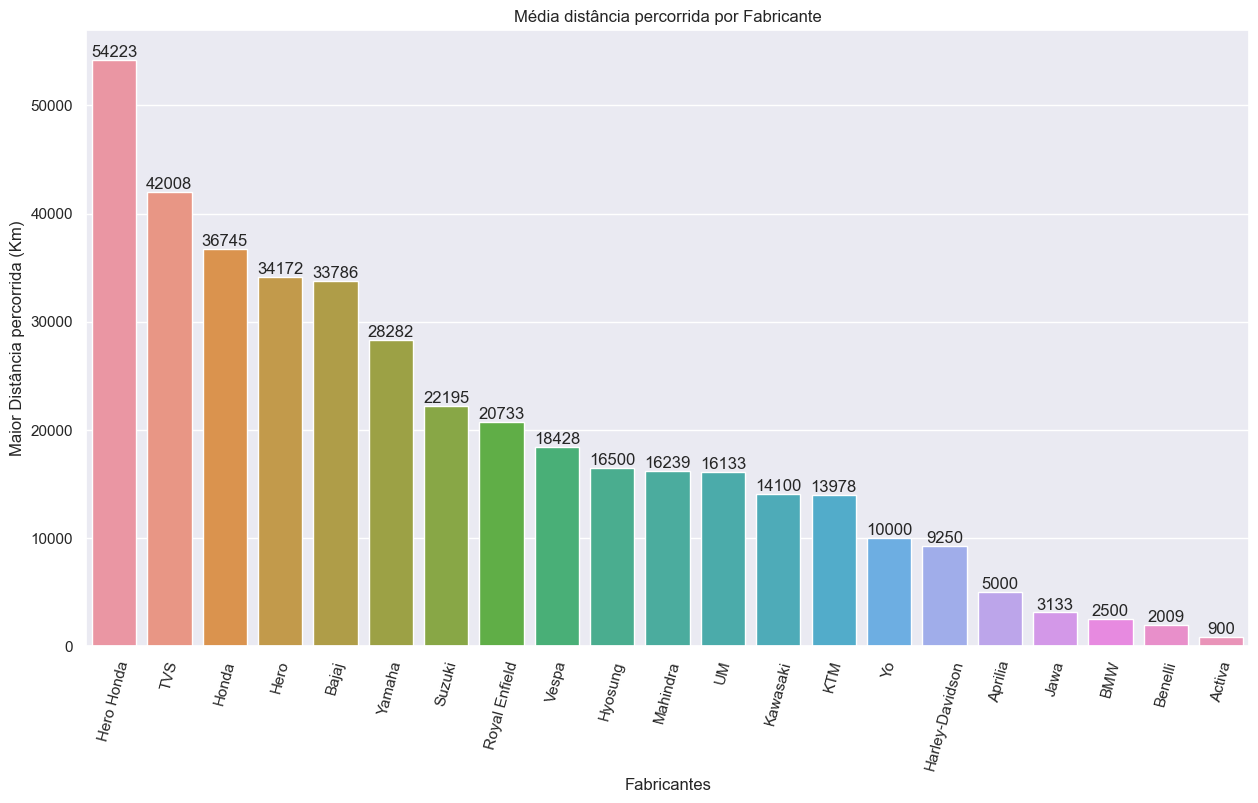

In [65]:
#24. Qual é a média de Km rodados por fabricante?

pergunta_24 = df.loc[ (df[ 'id' ] != 1056 ) & ( df[ 'id' ] != 363 ) ] 
# Retirando alguns outliers

pergunta_24 = pergunta_24[[ 'km_driven' , 'company' ]].groupby( 'company' ).mean().sort_values( 'km_driven', ascending=False).reset_index()
# Agrupando por fabricante e tirando a média Km rodados

pergunta_24[ 'km_driven' ] = pergunta_24[ 'km_driven' ].round()

ax = sns.barplot(
    data=pergunta_24, 
    x='company', 
    y='km_driven'
)

ax.set(
    xlabel='Fabricantes',
    ylabel='Maior Distância percorrida (Km)', 
    title='Média distância percorrida por Fabricante'
)

ax.bar_label(ax.containers[0])
plt.xticks(rotation=75);

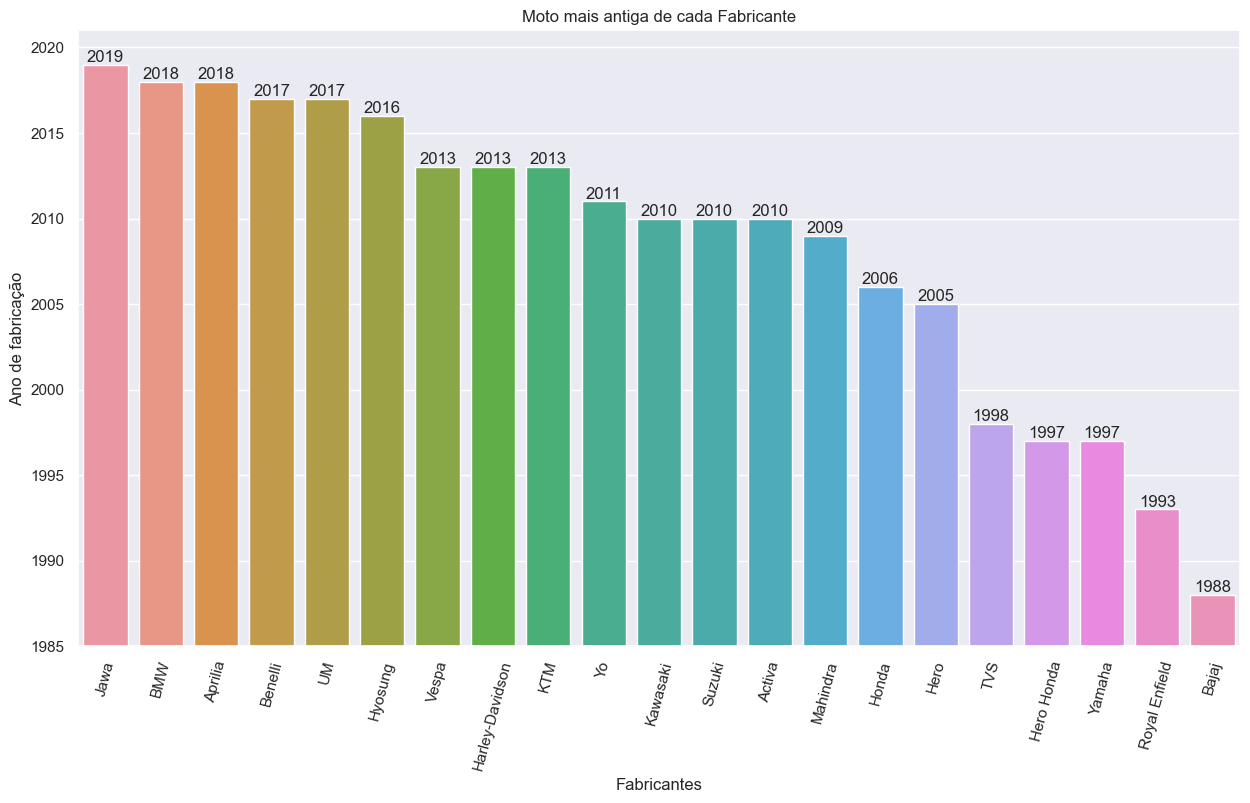

In [66]:
#25. Qual é o ano da moto mais velha de cada fabricante?

df_older = df[['year', 'company']].groupby('company').min().sort_values('year', ascending=False).reset_index()
# Agrupando por fabricante e pegando o menor ano de cada

ax = sns.barplot(
    data=df_older, 
    x='company', 
    y='year'
)

ax.set(
    xlabel='Fabricantes',
    ylabel='Ano de fabricação', 
    title='Moto mais antiga de cada Fabricante'
)

ax.set(ylim=(1985, 2021))

plt.xticks(rotation=75)
ax.bar_label(ax.containers[0]);

### Responta 26-27

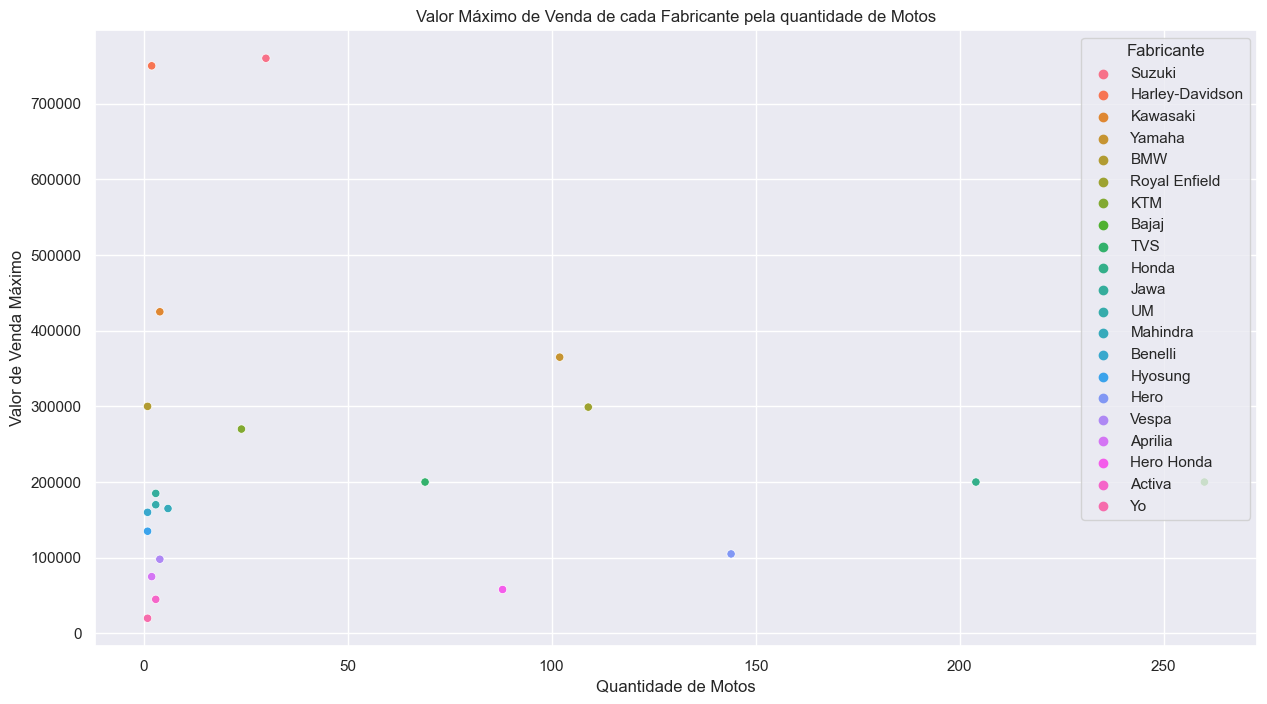

In [67]:
#26. O fabricante que possui a moto mais cara do Dataset é também o fabricante que possui menos motos cadastradas?

pergunta_26 = df[[ 'id' , 'selling_price' , 'company' ]].groupby( 'company' )
# Agrupando por fabricante

pergunta_26 = pergunta_26.agg(
    max_selling_price = pd.NamedAgg( 'selling_price', 'max' ),
    quantidade = pd.NamedAgg( 'id', 'count' ),
# Pegando o preço máximo de cada fabricante e fazendo a contagem
)

pergunta_26 = pergunta_26.sort_values( 'max_selling_price' , ascending=False).reset_index()

ax = sns.scatterplot(
    data = pergunta_26, 
    x = 'quantidade', 
    y = 'max_selling_price', 
    hue='company',
)

ax = ax.set(
    title='Valor Máximo de Venda de cada Fabricante pela quantidade de Motos',
    xlabel='Quantidade de Motos',
    ylabel='Valor de Venda Máximo',
)

plt.legend(title='Fabricante', loc='upper right');

In [68]:
#27. Qual o fabricante que possui a menor variação de valor de venda?

pergunta_27 = df[[ 'selling_price' , 'company' ]].groupby( 'company' )
# Agruopando os dados por fabricante

pergunta_27 = pergunta_27.agg(
    std = pd.NamedAgg('selling_price', 'std'),
    mean = pd.NamedAgg('selling_price', 'mean'),
# Fazendo o desvio padrão e a média do preço da venda
)

pergunta_27 = pergunta_27.sort_values( 'std' , ascending=True).reset_index()
pergunta_27 = pergunta_27.dropna()

pergunta_27 = pergunta_27.rename(columns={ 'std' : 'desvio padrão' })
pergunta_27.head(1)

,company,desvio padrão,mean
0,Aprilia,7071.067812,70000.0


### Pergunta final, resolvendo o problema de negócio

#### Quais motos eu devo comprar?
Leve em conta que eu desejo motos com no máximo 3 anos de uso; no máximo 40 mil quilometros rodados; que sejam de um único dono; que estejam sendo vendidas por possoas físicas e que tenham o valor pretendido de venda menor que o valor do showroom. Envie um relatório contendo o modelo, preço de venda, quilometro rodado e ano, ordenado por valor de venda de forma decrescente para uma planilia no Excel.

In [74]:
moto_para_compra = df[
    ( df[ 'year' ] >= 2019 ) & 
    ( df[ 'km_driven' ] <= 40000 ) & 
    ( df[ 'owner' ] == '1st owner' ) & 
    ( df[ 'seller_type' ] == 'Individual' ) &
    ( df[ 'selling_price' ] < df[ 'ex_showroom_price' ])][[ 'name', 'selling_price', 'km_driven', 'year' ]]
# Fazendo as masks de acordo com as condições

moto_para_compra = moto_para_compra.sort_values( 'selling_price', ascending=False)
moto_para_compra = moto_para_compra.reset_index()

moto_para_compra.columns= ['id no Dataset completo', "Modelo", "Preço de venda", "Quilometros rodados", "Ano de fabricação"]

moto_para_compra.to_excel("output.xlsx")
# Exportanto para o Excel

moto_para_compra

,id no Dataset completo,Modelo,Preço de venda,Quilometros rodados,Ano de fabricação
0,588,CBR-250R,200000,5500,2019
1,961,Renegade Mojave,170000,1400,2019
2,962,RC200,165000,4000,2019
3,252,Thunderbird 350X,145000,2700,2019
4,963,Dominar 400,145000,1200,2019
5,964,Classic 350,135000,4100,2019
6,969,Classic 350,120000,11000,2019
7,322,FZ25,110000,10000,2019
8,650,Gixxer SF Fi,100000,7000,2019
9,792,Xpulse 200,100000,8500,2019
